In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_validate,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import roc_curve # 绘制ROC曲线
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,f1_score,recall_score,precision_score
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv("D:\\AI_Code\\Feature_Engineering\\medicareDataNew.csv")   #读取csv文件

### 定义函数，补全缺失值

In [4]:
def fillna(fillMethod, df=None, val=0):
    if df is None:
        df = medicareDataNew.copy()
        
    temp_df = df.copy() #创建df的副本
    
    if fillMethod == "solid":
        temp_df["出院诊断LENTH_MAX"] = temp_df["出院诊断LENTH_MAX"].fillna(val)
    elif fillMethod == "mean":
        temp_df["出院诊断LENTH_MAX"] = temp_df["出院诊断LENTH_MAX"].fillna(temp_df["出院诊断LENTH_MAX"].mean())
    elif fillMethod == "mode":
        temp_df["出院诊断LENTH_MAX"] = temp_df["出院诊断LENTH_MAX"].fillna(temp_df["出院诊断LENTH_MAX"].mode().iloc[0])  # mode() 返回一个 Series，需要取第一个值
    elif fillMethod == "forward_fill":
        temp_df["出院诊断LENTH_MAX"] = temp_df["出院诊断LENTH_MAX"].fillna(method='ffill')  # pad 是旧版pandas的用法，新版建议使用ffill
    elif fillMethod == "backward_fill":
        temp_df["出院诊断LENTH_MAX"] = temp_df["出院诊断LENTH_MAX"].fillna(method='bfill')
    elif fillMethod == "interpolate":
        temp_df["出院诊断LENTH_MAX"] = temp_df["出院诊断LENTH_MAX"].interpolate()
    else:
        raise ValueError("Invalid fill method specified")

    return temp_df
    
# interpolate() 是一个用于填充缺失值（NaN）的方法。
# 它根据现有数据的线性、指数、时间序列或其他插值方法来估算缺失值，并填充到数据集中。
# 导入 fancyimpute 库中的几个缺失值填充方法，包括BiScaler（双尺度标准化）、KNN（K-最近邻）
# 、NuclearNormMinimization（最小化核范数）和SoftImpute（软奇异值分解填充）。

In [6]:
df = fillna('mode',df)
df['出院诊断LENTH_MAX'][120]   #之前是空缺的，说明空缺值确实填上了

22.0

In [7]:
df_array_data = df.values   #将dataframe转换成数组格式

In [11]:
df_except_res = df_array_data[:,1:]   #得到出去res一列的数据
df_except_res.shape

(16000, 81)

In [12]:
df_res = df['RES']   #得到res标签

## 使用三种计算相关系数的函数，计算相关系数

#### pearson函数

In [13]:
similarities_pearson = df.iloc[:,:-1].corrwith(df_res,axis=0,method='pearson')  #衡量线性相关性的指标

In [14]:
similarities_pearson_select = similarities_pearson.sort_values(ascending=False)[:30]

similarities_pearson_select
#使用pearson函数来计算其他列跟RES列的相关性

月统筹金额_MAX            0.362034
ALL_SUM              0.338321
本次审批金额_SUM           0.336957
月药品金额_MAX            0.336010
月就诊次数_MAX            0.322274
月药品金额_AVG            0.304869
月统筹金额_AVG            0.304556
起付标准以上自负比例金额_SUM     0.303763
顺序号_NN               0.292826
非账户支付金额_SUM          0.292288
个人账户金额_SUM           0.290628
月就诊次数_AVG            0.286445
可用账户报销金额_SUM         0.284520
统筹支付金额_SUM           0.284046
药品费发生金额_SUM          0.279079
药品费申报金额_SUM          0.277909
月就诊天数_MAX            0.276162
医疗救助医院申请_SUM         0.265631
医疗救助个人按比例负担金额_SUM    0.265570
月就诊天数_AVG            0.254622
就诊次数_SUM             0.251997
一天去两家医院的天数           0.250113
基本统筹基金支付金额_SUM       0.247200
民政救助补助_SUM           0.233199
城乡救助补助金额_SUM         0.232953
补助审批金额_SUM           0.225114
治疗费发生金额_SUM          0.222920
治疗费申报金额_SUM          0.222597
交易时间DD_NN            0.220404
医院_统筹金_MAX           0.220082
dtype: float64

#### spearman函数

In [15]:
similarities_spearman = df.iloc[:,:-1].corrwith(df_res,axis=0,method='spearman')

In [16]:
similarities_spearman_select = similarities_spearman.sort_values(ascending=False)[:18]  #先试了一下，18合适一些

similarities_spearman_select
#使用spearman函数来计算其他列跟RES列的相关性

医疗救助医院申请_SUM         0.298358
医疗救助个人按比例负担金额_SUM    0.296805
月统筹金额_MAX            0.173058
月就诊次数_MAX            0.159096
月就诊天数_MAX            0.155719
月药品金额_MAX            0.133865
月就诊次数_AVG            0.132062
月统筹金额_AVG            0.129340
一天去两家医院的天数           0.128686
月就诊天数_AVG            0.128285
治疗费申报金额_SUM          0.114974
贵重药品发生金额_SUM         0.114860
治疗费发生金额_SUM          0.114163
非账户支付金额_SUM          0.113869
个人账户金额_SUM           0.112923
可用账户报销金额_SUM         0.110729
起付标准以上自负比例金额_SUM     0.108367
就诊次数_SUM             0.100204
dtype: float64

#### kendall函数

In [17]:
similarities_kendall = df.iloc[:,:-1].corrwith(df_res,axis=0,method='kendall')

In [18]:
similarities_kendall_select = similarities_kendall.sort_values(ascending=False)[:10]    #先试了一下，前十可能性才大一些

similarities_kendall_select
##使用kendall函数来计算其他列跟RES列的相关性

医疗救助医院申请_SUM         0.297063
医疗救助个人按比例负担金额_SUM    0.295521
月统筹金额_MAX            0.141306
月就诊次数_MAX            0.134630
月就诊天数_MAX            0.132129
一天去两家医院的天数           0.123019
月药品金额_MAX            0.109304
月就诊次数_AVG            0.108646
月统筹金额_AVG            0.105609
月就诊天数_AVG            0.105604
dtype: float64

 #### 计算相关系数得到的重要的特征，有31个

In [19]:
import seaborn as sns

columns_pearson = list(similarities_pearson_select.index)
columns_spearman = list(similarities_spearman_select.index)
columns_kendall = list(similarities_kendall_select.index)

columns_total = columns_pearson + columns_spearman + columns_kendall
columns_total_set = list(set(columns_total))
# column4 = column1+column2+column3
# column_new = list(set(column4))
# column_new
columns_total_set
len(columns_total_set)   

31

#### 得到跟RES相关性较强的列与RES之间的相关性，并画出热力图，直观显示

<Axes: >

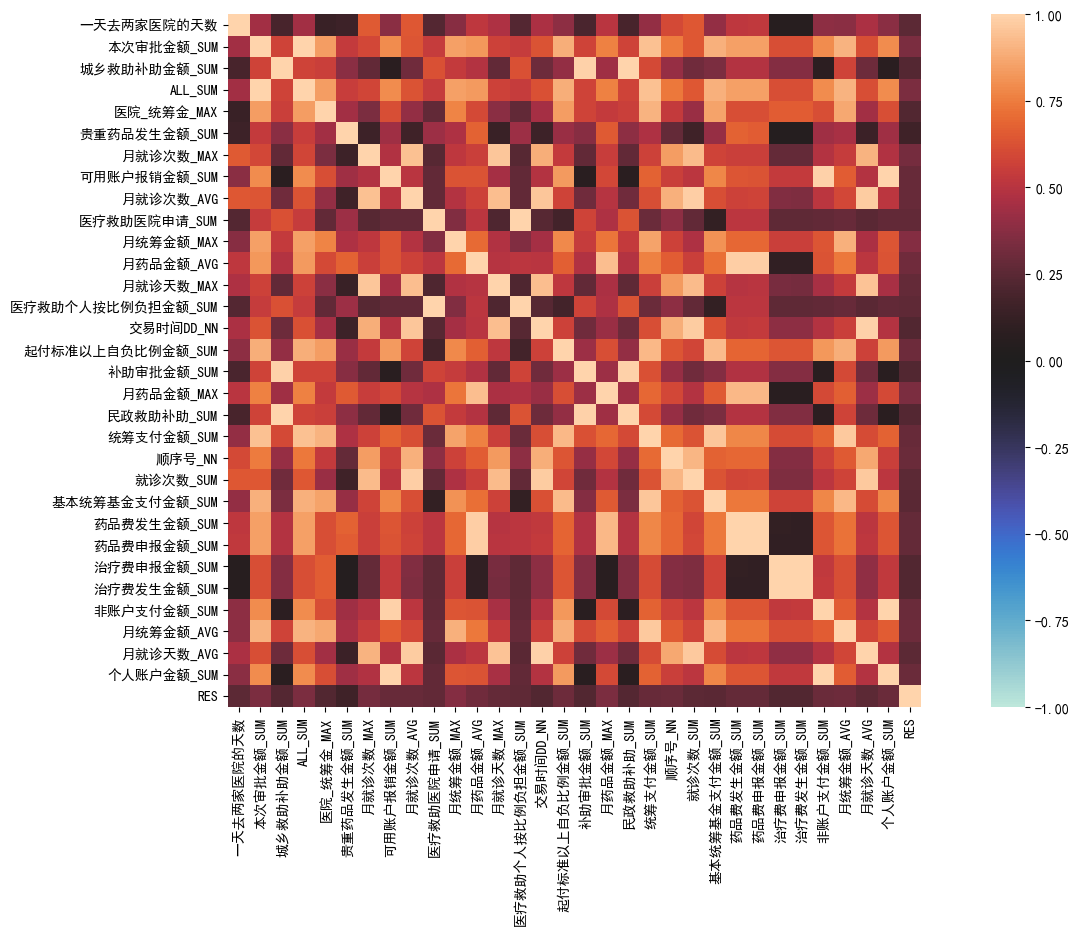

In [20]:
# df_new_corr = df.loc[:,columns_total_set].corr()
temp_columns = columns_total_set.copy()
temp_columns.append('RES')
df_new_corr = df[temp_columns].corr()

fig, ax = plt.subplots(figsize=(18, 9))
sns.heatmap(df_new_corr, square=True, vmax=1, vmin=-1, center=0)


|r|>0.95 存在显著性相关；
|r|≥0.8 高度相关；
0.5≤|r|<0.8 中度相关；
0.3≤|r|<0.5 低度相关；
|r|<0.3 关系极弱，认为不相关
如果数据满足Pearson相关系数的假设条件（正态、线性、等方差），则使用Pearson相关系数可以得到最直接的线性关系度量。当数据不满足这些条件时，尤其是对于非线性关系或者数据包含缺失值、异常值较多的情况下，Spearman和Kendall秩相关系数能提供更稳健的估计。Spearman和Kendall的区别在于后者在处理大量相等秩次时的方法更为细致，并且更适合于研究多个变量间的关联结构。

### 画出某个属性的散点图，频数分布直方图

In [21]:
y1_data = df.loc[:,'医疗救助医院申请_SUM'][df['RES'] ==1 ].values
y2_data = df.loc[:,'医疗救助医院申请_SUM'][df['RES'] !=1 ].values

# y3_data = df[df['RES'] == 1]['医疗救助医院申请_SUM'].values
# y4_data = df.loc[df['RES'] == 1, '医疗救助医院申请_SUM'].values

In [22]:
y11_data = y1_data[y1_data != 0]
y22_data = y2_data[y2_data != 0]

In [23]:
y11_data.shape,y22_data.shape
y11_data.max(),y22_data.max(),y11_data.mean(),y22_data.mean(),y11_data.min(),y22_data.min()

(157830.32, 132043.47, 30404.675637583892, 14921.370153846156, 79.03, 54.8)

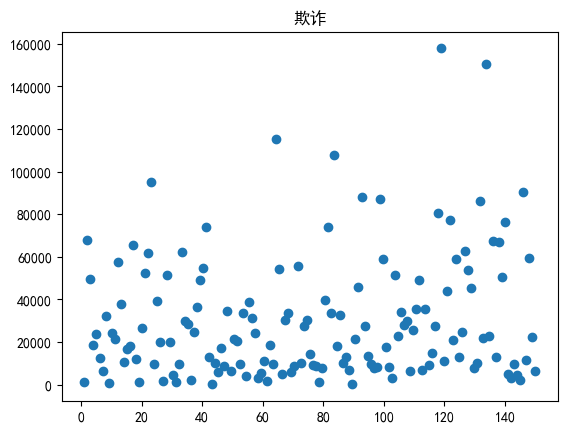

In [24]:
x_data = np.linspace(1,150,149)
plt.scatter(x=x_data,y=y11_data)
plt.title("欺诈")
plt.show()


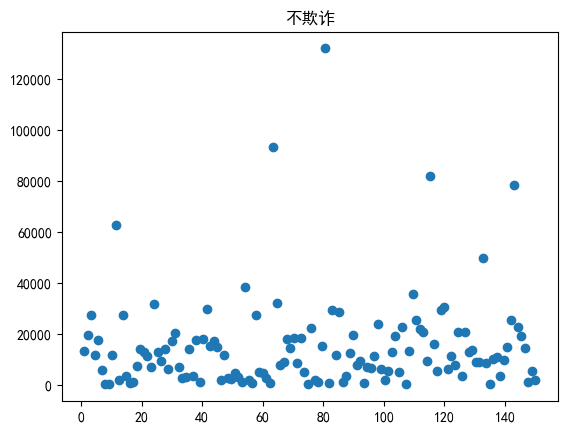

In [25]:
x1_data = np.linspace(1,150,130)
plt.scatter(x=x1_data,y=y22_data)
plt.title("不欺诈")
plt.show()



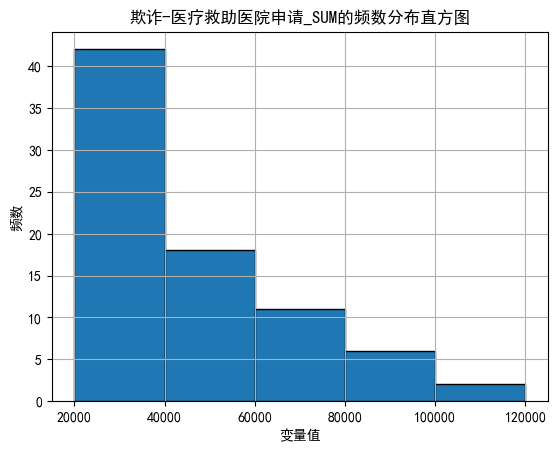

In [26]:
# 自定义区间的边界
custom_bins = [20000,40000,60000,80000,100000,120000]  # 这里是每段区间的边界值
# 绘制直方图
plt.hist(y11_data, bins=custom_bins, edgecolor='black')
# 设置标签和标题
plt.xlabel('变量值')
plt.ylabel('频数')
plt.title('欺诈-医疗救助医院申请_SUM的频数分布直方图')
# 添加网格线
plt.grid(True)
# 显示图像
plt.show()
# y22_data

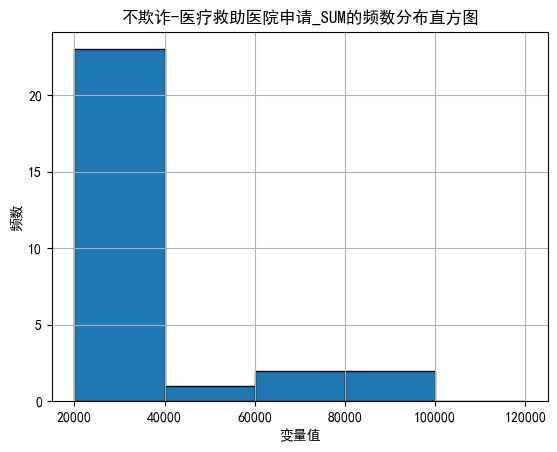

In [27]:
# 自定义区间的边界
custom_bins = [20000,40000,60000,80000,100000,120000]  # 这里是每段区间的边界值
# 绘制直方图
plt.hist(y22_data, bins=custom_bins, edgecolor='black')
# 设置标签和标题
plt.xlabel('变量值')
plt.ylabel('频数')
plt.title('不欺诈-医疗救助医院申请_SUM的频数分布直方图')
# 添加网格线
plt.grid(True)
# 显示图像
plt.show()


#### 卡方检验

In [28]:
from scipy.stats import chi2_contingency

def kafa(feature1,res,feature_important_list):
    contingency_table = pd.crosstab(df[feature1], df[res])
    # 进行卡方检验
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # 输出结果
    # 如果P值小于显著性水平（例如0.05），则认为两列之间存在显著关联
    if p < 0.05:
#         print("There is a significant relationship between {} and {}.\n".format(feature1,res))
        feature_important_list.append(feature1)
#     else:
#         print("There is no significant relationship between {} and {}.\n".format(feature1,res))
#     print("\n")
    return feature_important_list


In [29]:
kafa_important_list = []
for feature in columns_total_set:
    kafa(feature,'RES',kafa_important_list)

In [30]:
kafa_important_list   #卡方检验得出的跟res列相关性较强的列

['一天去两家医院的天数',
 '城乡救助补助金额_SUM',
 '贵重药品发生金额_SUM',
 '月就诊次数_MAX',
 '月就诊次数_AVG',
 '医疗救助医院申请_SUM',
 '月就诊天数_MAX',
 '医疗救助个人按比例负担金额_SUM',
 '交易时间DD_NN',
 '补助审批金额_SUM',
 '民政救助补助_SUM',
 '顺序号_NN',
 '就诊次数_SUM',
 '治疗费申报金额_SUM',
 '治疗费发生金额_SUM',
 '月就诊天数_AVG']

# 特征工程里的特征选择

#### 方差选择法

In [31]:
# 方差选择法（Variance Selection Method）是一种特征选择方法，主要用于机器学习和统计分析中，
# 通过计算特征的方差来评估其重要性或有效性。在大量特征中，那些方差较小的特征往往被认为是含有较少信息的，
# 因为它们的取值变化不大，对预测目标变量的影响可能较小。相反，方差较大的特征，其取值变化较大，
# 可能蕴含更多的信息量，有助于提升模型的预测能力。

from sklearn.feature_selection import VarianceThreshold

# 假设 fill_df 是 Pandas DataFrame，所有列都是特征
variance_threshold = VarianceThreshold(threshold=3)  #定义阈值
X_transformed = variance_threshold.fit_transform(df.values)

# 获取保留的特征索引
selected_feature_indices = np.where(variance_threshold.get_support())[0]

# 根据索引获取特征名称
variance_columns = list(df.columns[selected_feature_indices])

variance_columns

['个人编码',
 '一天去两家医院的天数',
 '月就诊天数_MAX',
 '月就诊天数_AVG',
 '就诊次数_SUM',
 '月就诊次数_MAX',
 '月就诊次数_AVG',
 '月统筹金额_MAX',
 '月统筹金额_AVG',
 '月药品金额_MAX',
 '月药品金额_AVG',
 '医院_就诊天数_MAX',
 '医院_就诊天数_AVG',
 '医院_统筹金_MAX',
 '医院_统筹金_AVG',
 '医院_药品_MAX',
 '医院_药品_AVG',
 '顺序号_NN',
 '交易时间DD_NN',
 '个人账户金额_SUM',
 '统筹支付金额_SUM',
 'ALL_SUM',
 '可用账户报销金额_SUM',
 '药品费发生金额_SUM',
 '药品费自费金额_SUM',
 '药品费申报金额_SUM',
 '贵重药品发生金额_SUM',
 '中成药费发生金额_SUM',
 '中草药费发生金额_SUM',
 '检查费发生金额_SUM',
 '检查费自费金额_SUM',
 '检查费申报金额_SUM',
 '贵重检查费金额_SUM',
 '治疗费发生金额_SUM',
 '治疗费自费金额_SUM',
 '治疗费申报金额_SUM',
 '手术费发生金额_SUM',
 '手术费自费金额_SUM',
 '手术费申报金额_SUM',
 '床位费发生金额_SUM',
 '床位费申报金额_SUM',
 '医用材料发生金额_SUM',
 '高价材料发生金额_SUM',
 '医用材料费自费金额_SUM',
 '成分输血申报金额_SUM',
 '其它发生金额_SUM',
 '其它申报金额_SUM',
 '一次性医用材料申报金额_SUM',
 '起付线标准金额_MAX',
 '起付标准以上自负比例金额_SUM',
 '医疗救助个人按比例负担金额_SUM',
 '最高限额以上金额_SUM',
 '基本统筹基金支付金额_SUM',
 '公务员医疗补助基金支付金额_SUM',
 '城乡救助补助金额_SUM',
 '基本个人账户支付_SUM',
 '非账户支付金额_SUM',
 '本次审批金额_SUM',
 '补助审批金额_SUM',
 '医疗救助医院申请_SUM',
 '残疾军人补助_SUM',
 '民政救助补助_SUM',
 '城乡优抚补助_SUM',
 '出院诊断病种

#### 相关系数

In [32]:
from sklearn.feature_selection import SelectKBest, chi2
# 使用SelectKBest和chi2来进行特征选择
selector = SelectKBest(score_func=chi2, k=25)  # k代表选择的特征数量

# 将特征数据（X）和目标变量（y）传入
X_selected = selector.fit_transform(df.iloc[:,:-1], df.iloc[:,-1])
# selected_feature_names2 = df.columns[:-1][selector.get_support()]
# selected_feature_names2
correlation_coefficient_columns = list(df.columns[:-1][selector.get_support()])
correlation_coefficient_columns

['月统筹金额_MAX',
 '月统筹金额_AVG',
 '月药品金额_MAX',
 '月药品金额_AVG',
 '医院_统筹金_MAX',
 '医院_统筹金_AVG',
 '医院_药品_MAX',
 '个人账户金额_SUM',
 '统筹支付金额_SUM',
 'ALL_SUM',
 '可用账户报销金额_SUM',
 '药品费发生金额_SUM',
 '药品费申报金额_SUM',
 '贵重药品发生金额_SUM',
 '治疗费发生金额_SUM',
 '治疗费申报金额_SUM',
 '起付标准以上自负比例金额_SUM',
 '医疗救助个人按比例负担金额_SUM',
 '基本统筹基金支付金额_SUM',
 '城乡救助补助金额_SUM',
 '非账户支付金额_SUM',
 '本次审批金额_SUM',
 '补助审批金额_SUM',
 '医疗救助医院申请_SUM',
 '民政救助补助_SUM']

#### 互信息法

In [33]:
# 或者使用SelectKBest方法选择特征并转换数据
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# 选择互信息最高的k个特征
selector = SelectKBest(mutual_info_classif, k=25)
X_selected = selector.fit_transform(df.iloc[:,:-1], df.iloc[:,-1])

# 获取被选择的特征索引
selected_feature_indices = selector.get_support(indices=True)

# 获取特征名
mutual_information_columns = list(df.columns[selected_feature_indices])

mutual_information_columns

['月就诊天数_MAX',
 '月就诊天数_AVG',
 '就诊次数_SUM',
 '月就诊次数_MAX',
 '月就诊次数_AVG',
 '月统筹金额_MAX',
 '月统筹金额_AVG',
 '月药品金额_MAX',
 '月药品金额_AVG',
 '医院_就诊天数_MAX',
 '医院_统筹金_MAX',
 '医院_药品_MAX',
 '顺序号_NN',
 '交易时间DD_NN',
 '个人账户金额_SUM',
 '统筹支付金额_SUM',
 'ALL_SUM',
 '可用账户报销金额_SUM',
 '药品费发生金额_SUM',
 '药品费申报金额_SUM',
 '起付标准以上自负比例金额_SUM',
 '基本统筹基金支付金额_SUM',
 '非账户支付金额_SUM',
 '本次审批金额_SUM',
 '医疗救助医院申请_SUM']

#### 上面三个方法得出的重要特征

In [34]:
total_columns1 = variance_columns+correlation_coefficient_columns+mutual_information_columns
total_columns1_set = list(set(total_columns1))
len(total_columns1_set)

65

## 封装式
特征选择（Wrapper-based Feature Selection）是一种基于学习器性能的特征选择方法。这种方法不是直接度量特征的重要性，而是将特征选择过程视为一个搜索最优特征子集的过程，通过训练不同的特征子集组合，并根据选定的学习算法评估其性能（如准确率、召回率、F1分数等），以此作为特征子集好坏的标准。

#### 后向剃除法

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd

# 假设df是一个包含特征和目标变量的DataFrame
# 假设最后一列为目标变量
X = df.iloc[:,:-1]  # 特征
y = df.iloc[:,-1]  # 目标变量

# 初始化逻辑回归模型
model = LogisticRegression()

# 使用RFE进行特征选择，这里选择保留20个特征
rfe_selector = RFE(model, n_features_to_select=20)

# 训练RFE模型
rfe_selector = rfe_selector.fit(X, y)

# 获取选择的特征索引
selected_feature_indices = rfe_selector.support_

# 获取特征名
selected_features_names4 = X.columns[selected_feature_indices]

# print("Selected Features using RFE with Logistic Regression:")
# print(selected_features_names4)
# 转换数据，仅保留选择的特征
# X_rfe = rfe_selector.transform(X)

backward_elimination_columns = list(selected_features_names4)

In [36]:
backward_elimination_columns

['个人编码',
 '月统筹金额_MAX',
 '月药品金额_MAX',
 '医院_统筹金_MAX',
 '医院_统筹金_AVG',
 '医院_药品_MAX',
 '个人账户金额_SUM',
 '统筹支付金额_SUM',
 'ALL_SUM',
 '可用账户报销金额_SUM',
 '药品费发生金额_SUM',
 '药品费申报金额_SUM',
 '贵重药品发生金额_SUM',
 '治疗费发生金额_SUM',
 '治疗费申报金额_SUM',
 '起付标准以上自负比例金额_SUM',
 '基本统筹基金支付金额_SUM',
 '非账户支付金额_SUM',
 '本次审批金额_SUM',
 '医疗救助医院申请_SUM']

#### 前向选择

In [37]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 假设df是一个包含特征和目标变量的DataFrame
# 假设最后一列为目标变量
X = df.iloc[:, :-1]  # 特征
y = df.iloc[:, -1]  # 目标变量
all_features = list(X.columns)  # 存储所有特征名称
selected_features = []  # 存储已选择的特征名称
best_accuracy = 0.0  # 存储最优模型的准确率

desired_number_of_features = 20

while len(selected_features) < min(len(all_features), desired_number_of_features):  # 自定义desired_number_of_features为你期望保留的特征数量
    best_new_feature = None
    best_accuracy_new = 0.0
    
    # 遍历剩余未被选中的特征
    for feature in all_features:
        if feature not in selected_features:
            temp_features = selected_features.copy()
            temp_features.append(feature)

            # 训练模型并计算准确率
            model = LogisticRegression()
            model.fit(X[temp_features], y)
            pred_y = model.predict(X[temp_features])
            accuracy = accuracy_score(y, pred_y)

            # 如果新加入特征后的准确率更高，则更新最优特征和准确率
            if accuracy > best_accuracy_new:
                best_accuracy_new = accuracy
                best_new_feature = feature
                
    # 将最优特征加入到已选择特征列表
    if best_new_feature is not None:
        selected_features.append(best_new_feature)
        best_accuracy = best_accuracy_new
        print(f"Selected new feature: {best_new_feature}, Accuracy: {best_accuracy}")

# # 最终选择的特征
# print("\nSelected Features using Forward Selection:")
# print(selected_features)


Selected new feature: 本次审批金额_SUM, Accuracy: 0.956
Selected new feature: 医院_统筹金_AVG, Accuracy: 0.9581875
Selected new feature: 顺序号_NN, Accuracy: 0.9585
Selected new feature: 床位费发生金额_SUM, Accuracy: 0.9585625
Selected new feature: 月药品金额_AVG, Accuracy: 0.9585625
Selected new feature: 交易时间YYYY_NN, Accuracy: 0.9585625
Selected new feature: 住院天数_SUM, Accuracy: 0.9585625
Selected new feature: 医院_统筹金_MAX, Accuracy: 0.958625
Selected new feature: 是否挂号, Accuracy: 0.9581875
Selected new feature: 最高限额以上金额_SUM, Accuracy: 0.95825
Selected new feature: 药品费发生金额_SUM, Accuracy: 0.9581875
Selected new feature: BZ_城乡优抚, Accuracy: 0.9576875
Selected new feature: 检查总费用在总金额占比, Accuracy: 0.9579375
Selected new feature: 就诊的月数, Accuracy: 0.956125
Selected new feature: 城乡救助补助金额_SUM, Accuracy: 0.958
Selected new feature: 月就诊医院数_AVG, Accuracy: 0.958375
Selected new feature: 交易时间YYYYMM_NN, Accuracy: 0.9586875
Selected new feature: BZ_民政救助, Accuracy: 0.9586875
Selected new feature: 医疗救助医院申请_SUM, Accuracy: 0.9590625
S

In [39]:
forward_selection_columns = selected_features
forward_selection_columns

['本次审批金额_SUM',
 '医院_统筹金_AVG',
 '顺序号_NN',
 '床位费发生金额_SUM',
 '月药品金额_AVG',
 '交易时间YYYY_NN',
 '住院天数_SUM',
 '医院_统筹金_MAX',
 '是否挂号',
 '最高限额以上金额_SUM',
 '药品费发生金额_SUM',
 'BZ_城乡优抚',
 '检查总费用在总金额占比',
 '就诊的月数',
 '城乡救助补助金额_SUM',
 '月就诊医院数_AVG',
 '交易时间YYYYMM_NN',
 'BZ_民政救助',
 '医疗救助医院申请_SUM',
 '医疗救助个人按比例负担金额_SUM']

#### 统计前面特征工程5种方法，各个特征出现的次数

In [48]:
# total_columns_sort1 = variance_columns + correlation_coefficient_columns + mutual_information_columns + backward_elimination_columns+forward_selection_columns
# from collections import Counter
# count = Counter(total_columns_sort1)

# # 转换为items列表并按值排序
# sorted_items1 = sorted(count.items(), key=lambda x: x[1], reverse=True)
# for key, value in sorted_items1:
#     print(f"{key}: {value}")                  

## 嵌入式
嵌入式（Embedded）特征选择是在构建机器学习模型的过程中自动进行特征选择的方法，也称为包裹式（Wrapper）特征选择的一个子类。这种方法不像过滤式特征选择那样独立于模型之外评价特征重要性，也不像后向剔除或前向选择那样以迭代的方式逐步选择特征，而是将特征选择过程直接嵌入到模型训练过程中，模型自身会学习哪些特征最为重要。

嵌入式特征选择方法通常会随着模型训练更新特征权重或稀疏性，从而使模型在训练的同时完成特征选择，例如正则化方法（L1正则化，又称为Lasso回归）、基于树的模型（如随机森林）的特征重要性排序等都是嵌入式特征选择的体现。在英文中，"Embedded Feature Selection" 即为此概念的表述。

#### 惩罚项

In [41]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# 假设fill_df是您的数据框，最后一列为标签
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# 创建带L1惩罚项的逻辑回归模型作为特征选择的基础模型
selector1 = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear', C=0.1))

# 使用训练数据拟合特征选择模型
selector1.fit(X, y)

# 对数据进行特征选择，返回一个子集特征矩阵
X_selected1 = selector1.transform(X)

# X_selected 是经过特征选择后得到的新数据集，它包含了从原始特征矩阵 X 中挑选出的、对目标变量（在这里是 iris.target）具有较高预测能力的特征所构成的子集。

# 具体来说，SelectFromModel 类结合了带有 L1 正则化的逻辑回归模型对特征进行了筛选，其中只有那些权重非零的特征
# 会被保留在 X_selected 中。X_selected 是一个由原始特征经过特征选择过程后剩下的特征构成的二维数组，
# 它的每一列代表一个选定的特征，每一行则对应一个样本的数据。

penalty_columns = list(df.columns[:-1][selector1.get_support()])

In [42]:
# penalty_columns

#### 梯度递增树模型

In [43]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# 创建一个GBDT模型作为特征选择的基础模型
gbdt = GradientBoostingClassifier()

# 使用SelectFromModel进行特征选择，依据GBDT模型的特征重要性
selector2 = SelectFromModel(gbdt)

# 使用训练数据拟合特征选择模型
selector2.fit(X, y)

# 对数据进行特征选择，返回一个子集特征矩阵
X_selected2 = selector2.transform(X)

gradientboost_columns = list(df.columns[:-1][selector2.get_support()])

In [44]:
gradientboost_columns

['一天去两家医院的天数',
 '月就诊天数_MAX',
 '就诊次数_SUM',
 '月就诊次数_MAX',
 '月统筹金额_MAX',
 '月药品金额_MAX',
 '医院_统筹金_AVG',
 '医院_药品_AVG',
 '交易时间YYYYMM_NN',
 '统筹支付金额_SUM',
 '药品费自费金额_SUM',
 '药品费申报金额_SUM',
 '中成药费发生金额_SUM',
 '中草药费发生金额_SUM',
 '基本统筹基金支付金额_SUM',
 '本次审批金额_SUM']

#### 随机森岭

In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# 创建一个GBDT模型作为特征选择的基础模型
gbdt = RandomForestClassifier()

# 使用SelectFromModel进行特征选择，依据GBDT模型的特征重要性
selector3 = SelectFromModel(gbdt)

# 使用训练数据拟合特征选择模型
selector3.fit(X, y)

# 对数据进行特征选择，返回一个子集特征矩阵
X_selected3 = selector3.transform(X)
randomforest_columns = list(df.columns[:-1][selector3.get_support()])

In [46]:
# randomforest_columns

### 神经网络

#### 使用三个分类模型，训练模型过程中，得到的重要的特征，一个特征最多出现三次

In [47]:
total_columns_sort1 = penalty_columns + gradientboost_columns + randomforest_columns

from collections import Counter
count = Counter(total_columns_sort1)
# for item,count in count.items():
#     print(f"{item}: {count}")
count.items()

# 转换为items列表并按值排序
sorted_items2 = sorted(count.items(), key=lambda x: x[1], reverse=True)
for key, value in sorted_items2:
    print(f"{key}: {value}")

就诊次数_SUM: 3
月就诊次数_MAX: 3
月统筹金额_MAX: 3
月药品金额_MAX: 3
医院_统筹金_AVG: 3
药品费自费金额_SUM: 3
药品费申报金额_SUM: 3
中成药费发生金额_SUM: 3
基本统筹基金支付金额_SUM: 3
本次审批金额_SUM: 3
一天去两家医院的天数: 2
月就诊次数_AVG: 2
月统筹金额_AVG: 2
医院_就诊天数_MAX: 2
医院_就诊天数_AVG: 2
医院_统筹金_MAX: 2
医院_药品_MAX: 2
顺序号_NN: 2
交易时间DD_NN: 2
交易时间YYYYMM_NN: 2
个人账户金额_SUM: 2
可用账户报销金额_SUM: 2
药品费发生金额_SUM: 2
中草药费发生金额_SUM: 2
治疗费发生金额_SUM: 2
治疗费申报金额_SUM: 2
一次性医用材料申报金额_SUM: 2
起付标准以上自负比例金额_SUM: 2
非账户支付金额_SUM: 2
出院诊断病种名称_NN: 2
出院诊断LENTH_MAX: 2
月就诊天数_MAX: 2
医院_药品_AVG: 2
统筹支付金额_SUM: 2
就诊的月数: 1
月就诊医院数_AVG: 1
交易时间YYYY_NN: 1
贵重药品发生金额_SUM: 1
检查费发生金额_SUM: 1
检查费自费金额_SUM: 1
检查费申报金额_SUM: 1
贵重检查费金额_SUM: 1
治疗费自费金额_SUM: 1
手术费发生金额_SUM: 1
手术费自费金额_SUM: 1
床位费发生金额_SUM: 1
高价材料发生金额_SUM: 1
医用材料费自费金额_SUM: 1
成分输血申报金额_SUM: 1
其它发生金额_SUM: 1
起付线标准金额_MAX: 1
医疗救助个人按比例负担金额_SUM: 1
最高限额以上金额_SUM: 1
公务员医疗补助基金支付金额_SUM: 1
城乡救助补助金额_SUM: 1
基本个人账户支付_SUM: 1
补助审批金额_SUM: 1
医疗救助医院申请_SUM: 1
残疾军人补助_SUM: 1
民政救助补助_SUM: 1
城乡优抚补助_SUM: 1
月就诊天数_AVG: 1
月药品金额_AVG: 1
ALL_SUM: 1
药品在总金额中的占比: 1
个人支付的药品占比: 1
治疗费用在总金额占比: 1


## 特征构造

目前用了几个特征进行简单交叉即加减乘除，发现没什么突出的效果

# 重要的特征是

第一档：基本统筹基金支付金额_SUM,本次审批金额_SUM,药品费申报金额_SUM,药品费发生金额_SUM,月药品金额_MAX(医院_药品_MAX和这个差不多，要稍微差一点),月统筹金额_MAX，月统筹金额_AVG,治疗费申报金额_SUM,ALL_SUM

第二档：统筹支付金额_SUM,月就诊次数_MAX,就诊次数_SUM,起付标准以上自负比例金额_SUM,可用账户报销金额_SUM,治疗费申报金额_SUM,非账户支付金额_SUM,医院_统筹金_AVG,月就诊天数_MAX/AVG,药品费发生金额_SUM,月统筹金额_MAX

第三档：医院_统筹金_MAX,贵重药品发生金额_SUM,医疗救助个人按比例负担金额_SUM,医疗救助医院申请_SUM,个人账户金额_SUM,一天去两家医院的天数